# **Exercício 1**

Tendo como base um artigo da wikipedia cujo verbete esteja em inglês, exiba duas nuvens de palavras: a primeira com o texto original e a segundo após um processamento para eliminar do texto elementos de pouco interesse (função customizada).

In [1]:
!pip install spacy nltk goose3 wordcloud matplotlib
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 7.9 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=2088f365617c6753515beb35db3044d7b10986607b533bf6fe52fde2dcb41a15
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 48.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import spacy
import nltk
from goose3 import Goose
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
url = 'https://en.wikipedia.org/wiki/Go_(programming_language)'

In [6]:
goose = Goose()
article = goose.extract(url=url)
article

In [8]:
text = article.cleaned_text
text[:1000]

'Go is a high-level general purpose programming language that is statically typed and compiled. It is known for the simplicity of its syntax and the efficiency of development that it enables by the inclusion of a large standard library supplying many needs for common projects.[12] It was designed at Google[13] in 2007 by Robert Griesemer, Rob Pike, and Ken Thompson, and publicly announced in November of 2009.[4] It is syntactically similar to C, but also has memory safety, garbage collection, structural typing,[7] and CSP-style concurrency.[14] It is often referred to as Golang to avoid ambiguity and because of its former domain name, , but its proper name is Go.[15]\n\nThere are two major implementations:\n• A frontend written in C++, called gofrontend, 18 originally a GCC frontend, providing gccgo, a GCC-based Go compiler; 19 later extended to also support LLVM, providing an LLVM-based Go compiler called gollvm. 20\n\nA third-party source-to-source compiler, GopherJS,[21] transpiles 

In [9]:
nlp = spacy.load('en_core_web_sm')

In [18]:
def process_text(text):
    doc = nlp(text)
    processed_words = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(processed_words)

processed_text = process_text(text)

processed_text[:1000]

'high level general purpose programming language statically typed compiled known simplicity syntax efficiency development enables inclusion large standard library supplying needs common projects.[12 designed google[13 2007 robert griesemer rob pike ken thompson publicly announced november 2009.[4 syntactically similar c memory safety garbage collection structural typing,[7 csp style concurrency.[14 referred golang avoid ambiguity domain proper go.[15 \n\n major implementations \n frontend written c++ called gofrontend 18 originally gcc frontend providing gccgo gcc based compiler 19 later extended support llvm providing llvm based compiler called gollvm 20 \n\n party source source compiler gopherjs,[21 transpiles javascript end web development \n\n designed google 2007 improve programming productivity era multicore networked machines large codebases.[22 designers wanted address criticisms languages use google useful characteristics:[23 \n static typing run time efficiency like c \n\n de

In [19]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

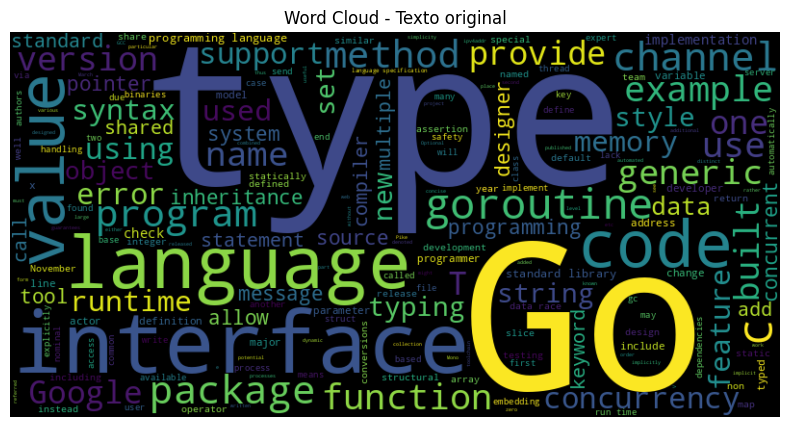

In [20]:
generate_wordcloud(text, 'Word Cloud - Texto original')

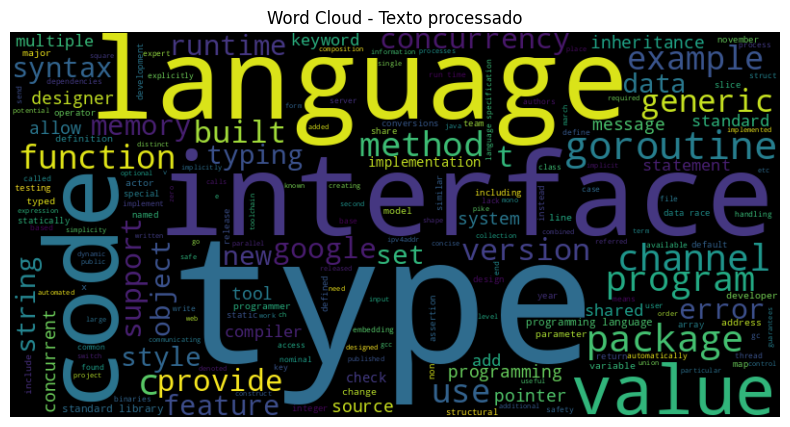

In [21]:
generate_wordcloud(processed_text, 'Word Cloud - Texto processado')

#**Exercício 2**

Exiba as 20 palavras mais frequentes tanto do texto original quanto do texto pre-processado, comparando os resultados de significado das palavras apresentadas.

---



In [26]:
from collections import Counter
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [24]:
def get_most_common_words(text, n=20):
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalpha()]
    word_counts = Counter(words)
    return word_counts.most_common(n)

In [28]:
original_most_common = get_most_common_words(text)
processed_most_common = get_most_common_words(processed_text)

In [29]:
original_most_common

[('the', 232),
 ('a', 136),
 ('and', 126),
 ('to', 120),
 ('of', 116),
 ('go', 108),
 ('in', 83),
 ('type', 76),
 ('is', 65),
 ('for', 55),
 ('by', 44),
 ('as', 44),
 ('that', 42),
 ('are', 38),
 ('with', 33),
 ('an', 32),
 ('or', 32),
 ('language', 31),
 ('it', 31),
 ('be', 31)]

In [30]:
processed_most_common

[('type', 78),
 ('language', 31),
 ('types', 25),
 ('code', 23),
 ('interface', 19),
 ('programming', 15),
 ('package', 15),
 ('standard', 14),
 ('like', 14),
 ('example', 14),
 ('data', 14),
 ('goroutines', 14),
 ('built', 13),
 ('value', 13),
 ('c', 12),
 ('channels', 12),
 ('google', 11),
 ('concurrency', 11),
 ('version', 11),
 ('interfaces', 11)]